In [31]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [33]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [34]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [80]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(df_market_data)
crypto_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [81]:
# Create a DataFrame with the scaled data
crypto_scaled = pd.DataFrame(crypto_scaled, columns = df_market_data.columns)

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data
crypto_scaled

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


---

### Find the Best Value for k Using the Original Data.

In [37]:
# Create a list with the number of k-values from 1 to 11


In [82]:
# Create an empty list to store the inertia values
inertia = []
for k in range(1,11):
    k_model= KMeans(n_clusters = k, random_state=1, n_init='auto')
    k_model.fit(crypto_scaled)
    inertia.append(k_model.inertia_)

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklea

In [83]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_series = pd.Series(inertia, index= range(1,11))




<Axes: >

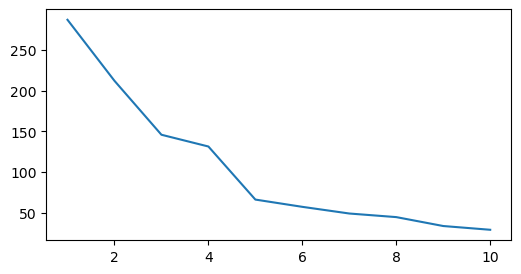

In [143]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_series.plot(figsize=(6,3))

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

--- 5 clusters

### Cluster Cryptocurrencies with K-means Using the Original Data

In [85]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters= 5, random_state= 1)

In [86]:
# Fit the K-Means model using the scaled data
model.fit(crypto_scaled)

C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [87]:
# Predict the clusters to group the cryptocurrencies using the scaled data
model.predict(crypto_scaled)

# Print the resulting array of cluster values.


array([0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 3, 4, 4, 0, 4, 0, 3, 4, 0, 4, 3, 0,
       3, 4, 4, 4, 4, 3, 0, 3, 4, 4, 2, 4, 3, 3, 1, 3, 4, 4, 3])

In [88]:
# Create a copy of the DataFrame
Crypto_cluster= crypto_scaled.copy()
Crypto_cluster

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


In [89]:
# Add a new column to the DataFrame with the predicted clusters
Crypto_cluster["clusters"] = model.predict(Crypto_cluster)
# Display sample data
Crypto_cluster

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,4
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,4
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029,4


In [137]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_scatter1 = Crypto_cluster.hvplot.scatter(x = 'price_change_percentage_24h', y = 'price_change_percentage_7d', by = 'clusters')
crypto_scatter1

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [91]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [95]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(Crypto_cluster)
# View the first five rows of the DataFrame. 
crypto_df = pd.DataFrame({
    'PC1': crypto_pca[:,0],
    'PC2': crypto_pca[:,1],
    'PC3': crypto_pca[:,2]})

crypto_df.head()

,PC1,PC2,PC3
0,2.468716,-0.756151,-0.414597
1,2.445878,-0.575278,-0.964807
2,-1.554832,-0.367607,0.671068
3,-1.540027,-0.401687,0.547103
4,3.498058,-1.481931,-0.234515


In [96]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
sum(pca.explained_variance_ratio_)

0.8788327449101365

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** With 3 components for PCA we retained 87.88% of the dataset.

In [99]:
# Create a new DataFrame with the PCA data.
crypto_df
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


,PC1,PC2,PC3
0,2.468716,-0.756151,-0.414597
1,2.445878,-0.575278,-0.964807
2,-1.554832,-0.367607,0.671068
3,-1.540027,-0.401687,0.547103
4,3.498058,-1.481931,-0.234515
5,2.889394,-0.747412,-0.170377
6,3.097009,-0.607013,-1.897777
7,2.769019,-0.506267,-1.013302
8,2.283546,-0.755016,-0.803010
9,-1.450223,-0.694341,0.386686


---

### Find the Best Value for k Using the PCA Data

In [101]:
# Create a list with the number of k-values from 1 to 11
k_list = list(range(1,11))
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [102]:
# Create an empty list to store the inertia values
inertia_pca = []

for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(crypto_df)
    inertia_pca.append(model.inertia_)

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

In [23]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


[]

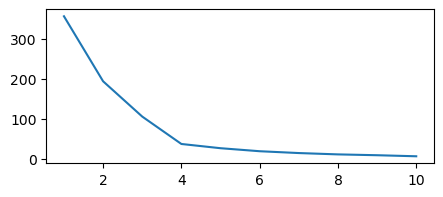

In [127]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve2 = pd.Series(inertia_pca, index=range(1,11)).plot(figsize=[5,2])
elbow_curve2.plot(figsize=[5,2])

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
4 clusters

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the other value was 5

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [104]:
# Initialize the K-Means model using the best value for k
k_model_pca = KMeans(n_clusters=4, random_state=1)

In [110]:
# Fit the K-Means model using the PCA data
k_model_pca.fit_transform(crypto_df)

C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adrian.fraile\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 4.0777628 ,  0.45235452, 10.20870783,  8.64925038],
       [ 4.15807913,  0.39451939,  9.87222151,  8.99646797],
       [ 0.51282863,  4.66384791, 10.14826533,  9.75150801],
       [ 0.42768652,  4.6112817 , 10.12318629,  9.8294445 ],
       [ 5.17888164,  1.19821169, 11.22383556,  8.75782792],
       [ 4.44679598,  0.60333348, 10.40101144,  8.36751211],
       [ 5.08398623,  1.19328489,  9.88357158,  9.66736361],
       [ 4.464654  ,  0.31986206,  9.88889683,  8.93509573],
       [ 3.98685087,  0.48036633, 10.04067414,  8.99639189],
       [ 0.56926156,  4.47434038, 10.30459198, 10.00155748],
       [ 0.50913339,  4.57398906,  9.51985968, 10.18321832],
       [ 0.52254371,  4.67542877, 10.15537671,  9.75732048],
       [ 0.55588975,  4.70463076, 10.23025136, 10.12588049],
       [ 5.42515507,  1.93722856, 10.79009154,  7.30480325],
       [ 0.25834936,  4.35317549,  9.9807545 ,  9.75969541],
       [ 4.09083213,  1.32483186,  9.75341064,  9.90350947],
       [ 0.62914996,  4.

In [111]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_model_pca.predict(crypto_df)
# Print the resulting array of cluster values.


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0])

In [116]:
# Create a copy of the DataFrame with the PCA data
crypto_predictions = k_model_pca.predict(crypto_df)
# Add a new column to the DataFrame with the predicted clusters

crypto_predictions = crypto_df.copy()
crypto_predictions['cluster'] = k_model_pca.predict(crypto_df)

# Display sample data
crypto_predictions

,PC1,PC2,PC3,cluster
0,2.468716,-0.756151,-0.414597,1
1,2.445878,-0.575278,-0.964807,1
2,-1.554832,-0.367607,0.671068,0
3,-1.540027,-0.401687,0.547103,0
4,3.498058,-1.481931,-0.234515,1
5,2.889394,-0.747412,-0.170377,1
6,3.097009,-0.607013,-1.897777,1
7,2.769019,-0.506267,-1.013302,1
8,2.283546,-0.755016,-0.803010,1
9,-1.450223,-0.694341,0.386686,0


In [140]:
# Create a scatter plot using hvPlot by setting 
crypto_scatter2 = crypto_predictions.hvplot.scatter(x='PC1', y='PC2', by= 'cluster')
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_scatter2

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

TypeError: unsupported operand type(s) for +: 'Axes' and 'Axes'

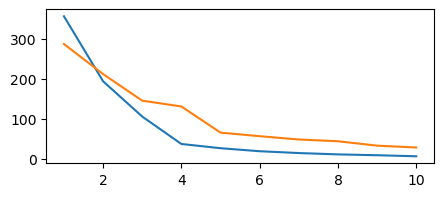

In [134]:
# Composite plot to contrast the Elbow curves
import holoviews as hv
composite_elbow = pd.Series(inertia_pca, index=range(1,11)).plot(figsize=[5,2]) + pd.Series(inertia, index= range(1,11)).plot(figsize=[5,2])


In [142]:
# Composite plot to contrast the clusters

composite_clusters = crypto_scatter1 + crypto_scatter2
composite_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After using the PCA method, I can easily visualize the separation of clusters in a more precise manner.